<a href="https://colab.research.google.com/github/ParnaviSen03/Sentiment_Analysis_Twitter_Reddit/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scrapping Reddit data

In [1]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.7 MB/s eta 0:00:00


In [52]:
import pandas as pd
import numpy as np
import re
import string
import emoji

In [ ]:
import os
import praw
from prawcore.exceptions import NotFound
from tqdm import tqdm

arr=[]
reddit = praw.Reddit(
    client_id='eLHIfVLEUxnTQlLlGt29_Q',
    client_secret='xalSQxSsLr5oxApVsrobL5dyasmCOw',
    user_agent='python:my_reddit_sentiment_app:v1.0.0 (by u/on_a_no_buy)'
)

try:
    subreddit = reddit.subreddit('sneakers')
    for post in tqdm(subreddit.hot(limit=1000)):
        #print(post.title)
        #print(post.selftext)
        if len(post.comments) > 0:
            comment=post.comments[0].body
        else:
            comment=" "
        arr.append([post.title,post.selftext,post.upvote_ratio,post.created_utc,post.score,comment])
except NotFound:
    print("The requested resource was not found. Please check the subreddit name or resource ID.")
df_sneakers = pd.DataFrame(arr, columns=['Title', 'Body','Upvote_ratio','Timestamp','Upvote_num','comments'])


In [ ]:
#Store the subreddit as csv
df_sneakers.to_csv('sneakers.csv', index=False)


In [ ]:
#Merge all the datasets together
# Path to the folder containing the CSV files
folder_path = 'Dataframe_new'

# List to store the DataFrames
dataframes = []

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV into a DataFrame
        df = pd.read_csv(file_path)
        df['topic'] = os.path.splitext(file_name)[0]
        dataframes.append(df)
        print(f"Loaded: {file_name}")

print(f"Total CSV files read: {len(dataframes)}")

In [ ]:
combined_df = pd.concat(dataframes, ignore_index=True)


In [ ]:
#save the combined scrapped data into a csv file
combined_df.to_csv('athletic_apparel.csv', index=False)


## Preprocessing data

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [18]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
# Function to load CSV
def load_csv(file_path):
    return pd.read_csv(file_path)

# Function to check missing values
def check_missing_values(df):
    return df.isnull().sum()

# Function to clean text (lowercase, remove special characters and numbers)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        return text.strip()
    return ""

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        return " ".join([word for word in text.split() if word.lower() not in stop_words])
    return ""

# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return ""

# Function to tokenize words
def tokenize_words(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []

# Function to preprocess the dataframe
def preprocess_dataframe(df):
    df['clean_Title'] = df['Title'].apply(clean_text)
    df['clean_Body'] = df['Body'].apply(clean_text)
    df['clean_comments'] = df['comments'].apply(clean_text)

    df['clean_Title'] = df['clean_Title'].apply(remove_stopwords)
    df['clean_Body'] = df['clean_Body'].apply(remove_stopwords)
    df['clean_comments'] = df['clean_comments'].apply(remove_stopwords)

    df['clean_Title'] = df['clean_Title'].apply(lemmatize_text)
    df['clean_Body'] = df['clean_Body'].apply(lemmatize_text)
    df['clean_comments'] = df['clean_comments'].apply(lemmatize_text)

    df['tokenized_Title'] = df['clean_Title'].apply(tokenize_words)
    df['tokenized_Body'] = df['clean_Body'].apply(tokenize_words)
    df['tokenized_comments'] = df['clean_comments'].apply(tokenize_words)

    df['merged'] = df.apply(lambda row: np.concatenate([row['tokenized_Title'], row['tokenized_Body'], row['tokenized_comments']]), axis=1)

    return df

# Function to process CSV file
def process_csv(file_path):
    df = load_csv(file_path)
    print(f"Missing values in {file_path}:\n", check_missing_values(df))
    df = preprocess_dataframe(df)
    return df

In [19]:
# Process two different CSV files
df1 = process_csv('athletic_apparel.csv')
df2 = process_csv('technology_companies.csv')

Missing values in athletic_apparel.csv:
 Title              0
Body            2834
Upvote_ratio       0
Timestamp          0
Upvote_num         0
comments           0
topic              0
dtype: int64
Missing values in technology_companies.csv:
 Title              0
Body            5309
Upvote_ratio       0
Timestamp          0
Upvote_num         0
comments           0
topic              0
dtype: int64


In [20]:
# Display final merged column from each dataset
print(df1[['merged']].head())
print(df2[['merged']].head())

                                              merged
0  [id, post, google, article, number, start, rem...
1  [taipeiexclusive, bubble, tea, samba, yay, nay...
2  [gazelle, indoor, burgundy, look, good, new, m...
3  [team, adidas, stan, smith, campus, definitely...
4          [concept, kick, x, adidas, aruku, strung]
                                              merged
0  [support, megathread, november, question, need...
1  [oh, yeah, make, sense, blocked, ai, overview,...
2  [google, say, gemini, misused, launch, major, ...
3  [reason, dark, web, alert, today, seems, crony...
4  [impeach, impeach, tr, make, google, suggestio...


## VADER implementation

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
# Function to initialize sentiment analyzer
def initialize_sentiment_analyzer():
    return SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def compute_sentiment(df, analyzer):
    df['sentiment'] = df['merged'].apply(lambda x: analyzer.polarity_scores(" ".join(x)))
    df['sentiment'] = df['sentiment'].apply(lambda x: x['compound'])
    return df

# Function to assign mood labels based on sentiment scores
def assign_mood(df):
    df['mood'] = 'neutral'  # Default value
    df.loc[df['sentiment'] > 0.05, 'mood'] = 'positive'
    df.loc[df['sentiment'] < -0.05, 'mood'] = 'negative'
    return df

# Function to visualize mood distribution
def plot_mood_distribution(df):
    mood_counts = df['mood'].value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(mood_counts.index, mood_counts.values)
    plt.xlabel("Mood")
    plt.ylabel("Count")
    plt.title("Distribution of Mood Categories")
    plt.show()

# Function to plot mood distribution grouped by topic
def plot_mood_by_topic(df):
    mood_grouped = df.groupby(['topic', 'mood']).size().unstack()
    mood_grouped.plot(kind='bar', figsize=(8, 5))
    plt.xlabel("Topic")
    plt.ylabel("Count")
    plt.title("Mood Distribution Grouped by Category")
    plt.show()

# Function to perform full sentiment analysis
def sentiment_analysis_pipeline(df):
    analyzer = initialize_sentiment_analyzer()
    df = compute_sentiment(df, analyzer)
    df = assign_mood(df)
    return df

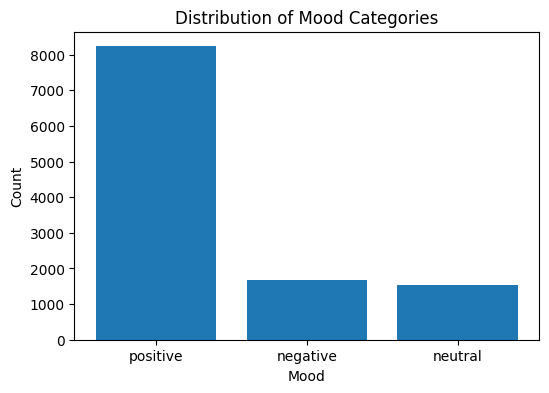

In [31]:
# Example usage
df1 = sentiment_analysis_pipeline(df1)
plot_mood_distribution(df1)

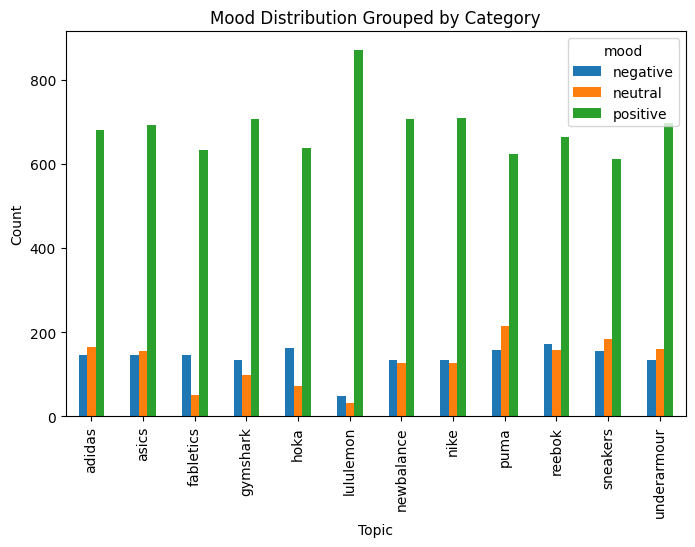

In [32]:
plot_mood_by_topic(df1)

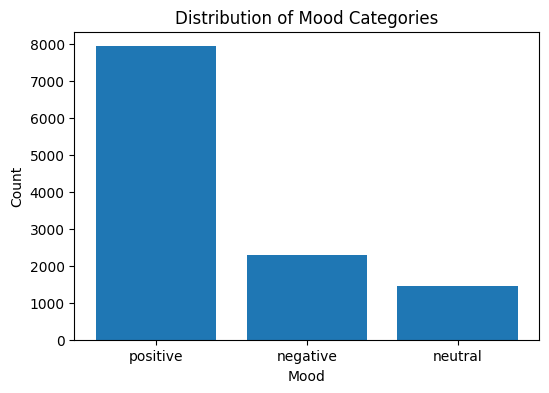

In [33]:
df2 = sentiment_analysis_pipeline(df2)
plot_mood_distribution(df2)

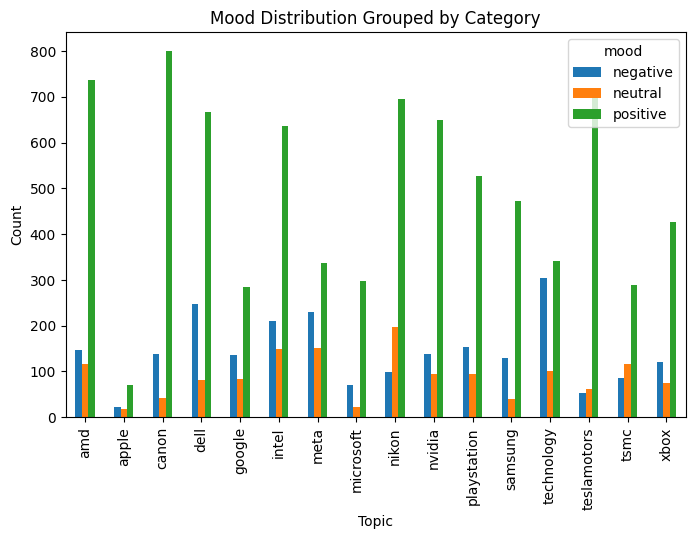

In [34]:
plot_mood_by_topic(df2)

# K-Means Clustering

In [36]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.2 MB/s eta 0:00:00


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [48]:
# Function to load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Function to combine text columns
def combine_text_columns(df, columns):
    df["text"] = df[columns].astype(str).agg(" ".join, axis=1)
    return df

# Function to replace emojis with words
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

# Function to preprocess text (Reusing previous text processing logic)
def preprocess_text(text):
    text = replace_emojis(text)  # Replace emojis with words
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words("english"))  # Define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Function to apply text preprocessing
def preprocess_dataframe(df):
    df["cleaned_text"] = df["text"].apply(preprocess_text)
    return df

# Function to convert text into TF-IDF vectors
def vectorize_text(df, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(df["cleaned_text"])
    return X, vectorizer

# Function to apply K-Means clustering
def apply_kmeans(X, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    return kmeans.fit_predict(X)

# Function to visualize clusters using PCA
def plot_clusters_pca(X, df):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())  # Convert sparse matrix to array
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.7)
    plt.colorbar(scatter, label="Cluster")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("K-Means Clusters (PCA Reduced)")
    plt.show()

# Function to visualize cluster distribution
def plot_cluster_distribution(df, num_clusters):
    plt.figure(figsize=(8, 5))
    plt.hist(df["Cluster"], bins=num_clusters, edgecolor="black", alpha=0.7)
    plt.xlabel("Cluster Number")
    plt.ylabel("Frequency")
    plt.title("Distribution of Clusters")
    plt.show()

# Full pipeline function
def text_clustering_pipeline(file_path, text_columns, num_clusters=3):
    df = load_dataset(file_path)
    df = combine_text_columns(df, text_columns)
    df = preprocess_dataframe(df)
    X, _ = vectorize_text(df)
    df["Cluster"] = apply_kmeans(X, num_clusters)
    plot_clusters_pca(X, df)
    return df

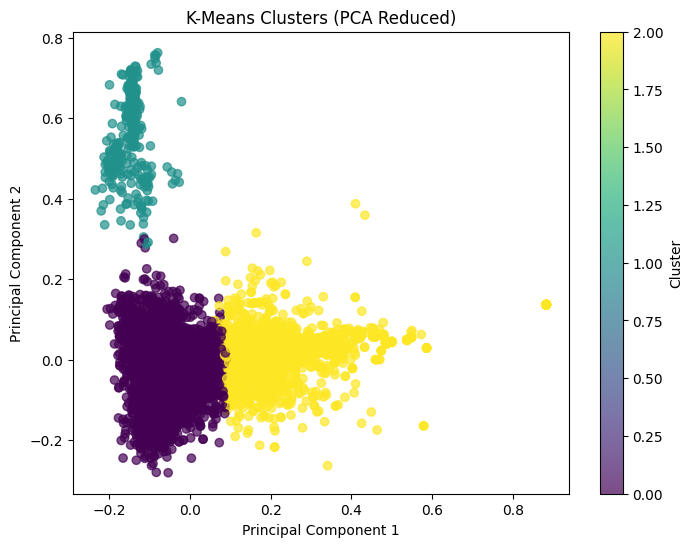

In [49]:
df1 = text_clustering_pipeline("athletic_apparel.csv", ["Title", "Body", "comments"], num_clusters=3)

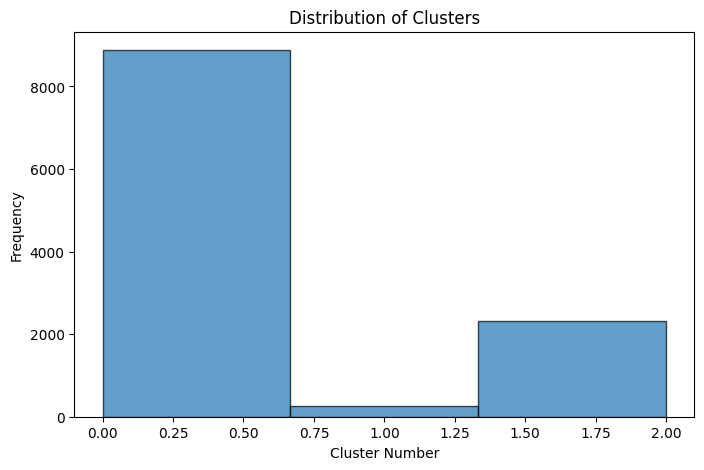

In [43]:
plot_cluster_distribution(df1, num_clusters=3)

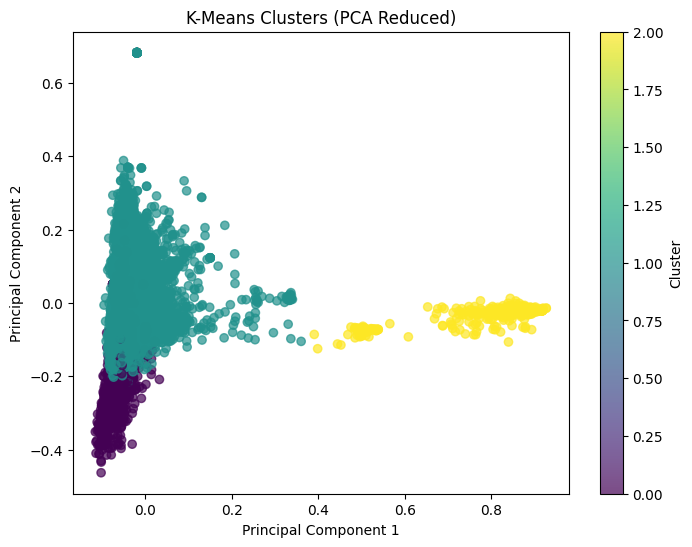

In [50]:
df2 = text_clustering_pipeline("technology_companies.csv", ["Title", "Body", "comments"], num_clusters=3)

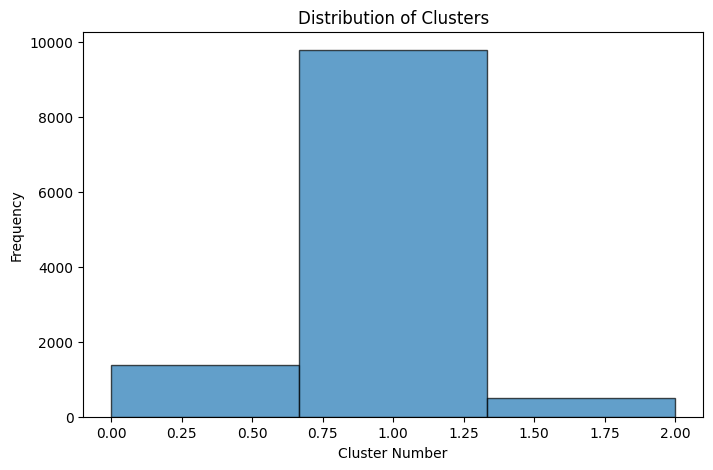

In [51]:
plot_cluster_distribution(df2, num_clusters=3)